In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Загружаем набор данных
wine = load_wine()

In [3]:
#Разделяем данные на признаки X и целевую переменную y
X = wine.data
y = wine.target

In [4]:
#Разбиваем данные на тренировочную и тестовую выборки (80% на тренировки, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Создаем объект классификатора random forest и обучаем его на данных
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Получаем важности признаков
importances = rf.feature_importances_

In [7]:
#Чтобы удобно было создаем DataFrame с названиями признаков и их важностями
feature_names = wine.feature_names
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [8]:
# Сортируем,чтобы самые важные оказались в самом начале
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [9]:
#результат
print(feature_importances)

                         Feature  Importance
6                     flavanoids    0.202293
9                color_intensity    0.171202
12                       proline    0.139046
0                        alcohol    0.112398
11  od280/od315_of_diluted_wines    0.111564
10                           hue    0.070891
4                      magnesium    0.036841
1                     malic_acid    0.035703
3              alcalinity_of_ash    0.032425
5                  total_phenols    0.029279
8                proanthocyanins    0.023561
2                            ash    0.021282
7           nonflavanoid_phenols    0.013515


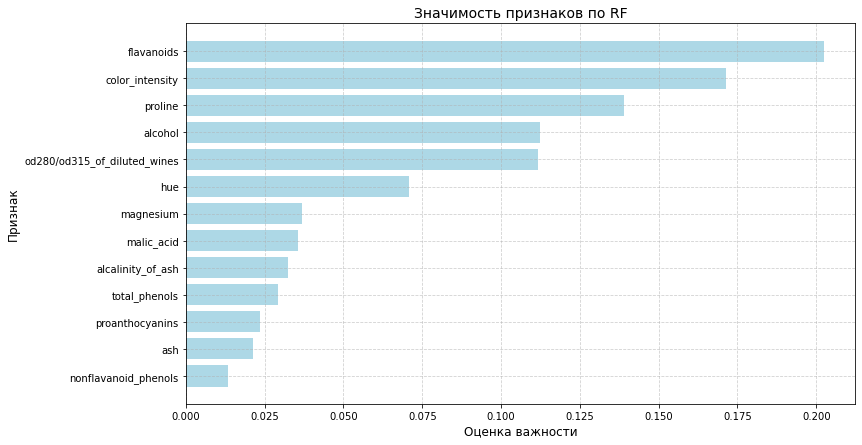

In [16]:
#теперь визуализируем(столбчатая диаграмма)
plt.figure(figsize=(12, 7))  #ширина и высота графика
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='lightblue')  #цвет столбиков
plt.xlabel('Оценка важности', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Значимость признаков по RF', fontsize=14)
plt.gca().invert_yaxis() #переворачиваем y,чтобы важные признаки были наверху
plt.grid(True, linestyle='--', alpha=0.6)  #чтобы лучше читалось
plt.show()